In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

# Time_Series_using_Prophet_for_Uniivariate

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nyc_energy_consumption.csv')

In [5]:
df.head()

timeStamp  demand  precip   temp
0  2012-01-01 00:00:00  4937.5     0.0  46.13
1  2012-01-01 01:00:00  4752.1     0.0  45.89
2  2012-01-01 02:00:00  4542.6     0.0  45.04
3  2012-01-01 03:00:00  4357.7     0.0  45.03
4  2012-01-01 04:00:00  4275.5     0.0  42.61

In [7]:

df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [9]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [13]:

ny_df=df.set_index('timeStamp')

array([<Axes: xlabel='timeStamp'>, <Axes: xlabel='timeStamp'>,
       <Axes: xlabel='timeStamp'>], dtype=object)

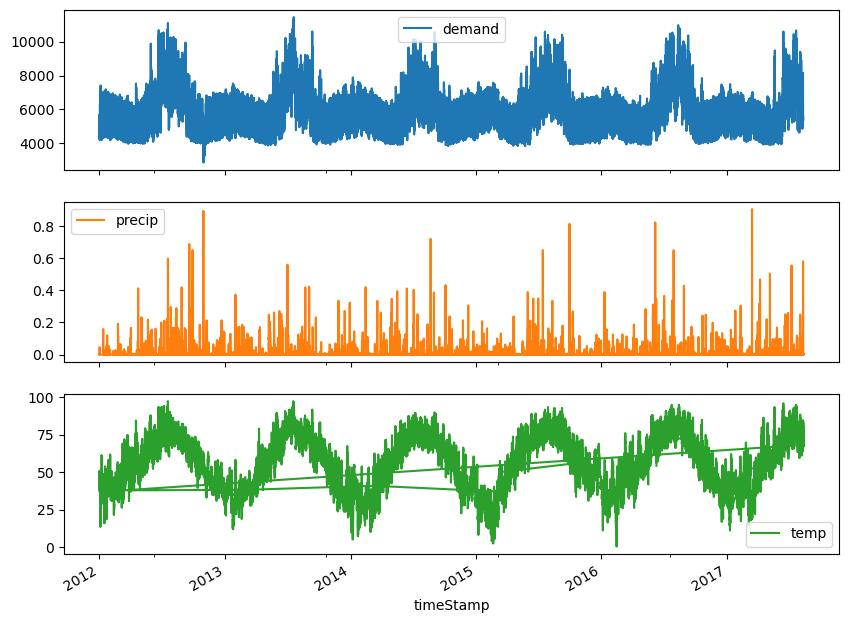

In [15]:
ny_df.plot(subplots=True)

In [17]:

ny_df.resample('D').mean()

demand    precip       temp
timeStamp                                   
2012-01-01  4954.833333  0.002487  46.510000
2012-01-02  5302.954167  0.000000  40.496667
2012-01-03  6095.512500  0.000000  26.672500
2012-01-04  6336.266667  0.000000  20.585000
2012-01-05  6130.245833  0.000000  33.577500
...                 ...       ...        ...
2017-08-08  6471.626042  0.000000  71.039167
2017-08-09  6811.112167  0.047529  73.852500
2017-08-10  5582.297000  0.002033  75.217500
2017-08-11          NaN  0.000000  72.767917
2017-08-12          NaN  0.000443  69.771429

[2051 rows x 3 columns]

array([<Axes: xlabel='timeStamp'>, <Axes: xlabel='timeStamp'>,
       <Axes: xlabel='timeStamp'>], dtype=object)

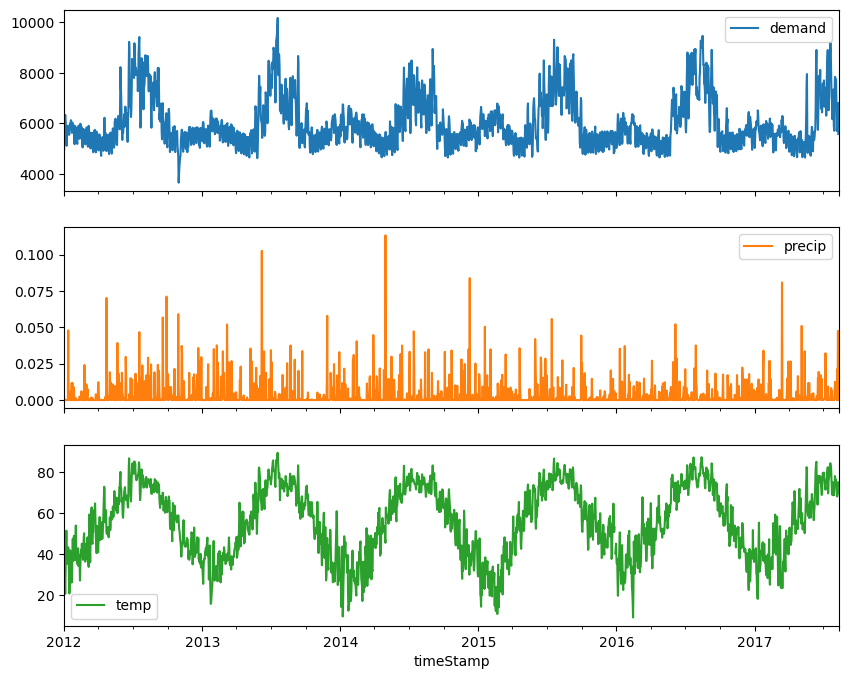

In [21]:
ny_df.resample('D').mean().plot(subplots=True)

C:\Users\rtekem\AppData\Local\Temp\ipykernel_18440\1225377362.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



array([<Axes: xlabel='timeStamp'>, <Axes: xlabel='timeStamp'>,
       <Axes: xlabel='timeStamp'>], dtype=object)

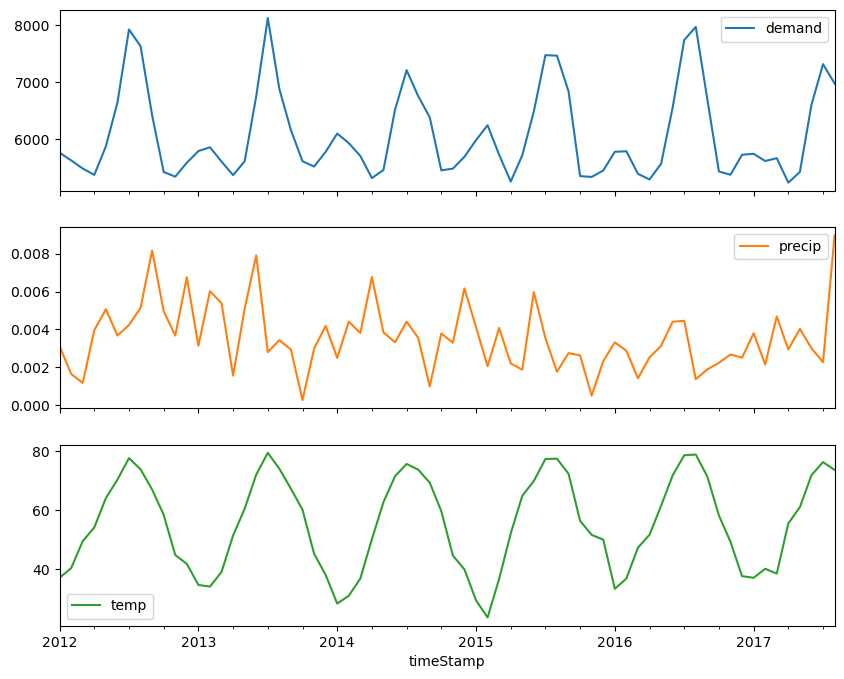

In [23]:
ny_df.resample('M').mean().plot(subplots=True)

In [27]:

ny_df_daily=ny_df.resample('D').mean()

In [30]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [34]:
from prophet import Prophet

In [36]:
ny_df_daily.head()

demand    precip       temp
timeStamp                                   
2012-01-01  4954.833333  0.002487  46.510000
2012-01-02  5302.954167  0.000000  40.496667
2012-01-03  6095.512500  0.000000  26.672500
2012-01-04  6336.266667  0.000000  20.585000
2012-01-05  6130.245833  0.000000  33.577500

In [38]:

ny_df_final=ny_df_daily.reset_index()[['timeStamp','demand']].rename({'timeStamp':'ds','demand':'y'}, axis='columns')

In [42]:

ny_df_final.tail()

ds            y
2046 2017-08-08  6471.626042
2047 2017-08-09  6811.112167
2048 2017-08-10  5582.297000
2049 2017-08-11          NaN
2050 2017-08-12          NaN

In [44]:
train=ny_df_final[(ny_df_final['ds'] >= '2012-01-01') & (ny_df_final['ds'] <= '2017-04-30')]
test=ny_df_final[(ny_df_final['ds'] > '2017-04-30')]

In [46]:
train.shape

(1947, 2)

In [48]:

test.shape
     

(104, 2)

In [50]:

test

ds            y
1947 2017-05-01  5417.231583
1948 2017-05-02  5697.950042
1949 2017-05-03  5354.628500
1950 2017-05-04  5235.704833
1951 2017-05-05  5358.639500
...         ...          ...
2046 2017-08-08  6471.626042
2047 2017-08-09  6811.112167
2048 2017-08-10  5582.297000
2049 2017-08-11          NaN
2050 2017-08-12          NaN

[104 rows x 2 columns]

In [52]:

m = Prophet(interval_width=0.95,yearly_seasonality=True)

In [54]:

m.fit(train)

10:57:05 - cmdstanpy - INFO - Chain [1] start processing
10:57:05 - cmdstanpy - INFO - Chain [1] done processing


In [56]:

m.params

OrderedDict([('lp__', array([[5008.93]])),
             ('k', array([[0.0719864]])),
             ('m', array([[0.594485]])),
             ('delta',
              array([[-2.41958e-08, -1.02196e-02, -6.99955e-02, -4.08400e-05,
                      -7.41319e-08, -1.47573e-07, -4.40613e-08,  7.84079e-08,
                      -5.91069e-08, -1.21690e-07, -4.58484e-02, -5.09678e-02,
                      -4.11113e-08,  1.61811e-06,  1.83664e-01,  4.77067e-02,
                      -6.37164e-08, -7.34837e-02, -6.62132e-02,  1.39346e-07,
                       2.32319e-07, -3.16977e-08,  1.56664e-02,  2.18398e-03,
                       5.42049e-08]])),
             ('sigma_obs', array([[0.0460283]])),
             ('beta',
              array([[-0.03473   , -0.0704778 ,  0.0575821 ,  0.0470505 , -0.0140608 ,
                      -0.0049974 , -0.00388817, -0.00073205,  0.00240753, -0.00756529,
                       0.00404114,  0.00482936, -0.00790341, -0.00470648,  0.00701066,
          

In [58]:

future = m.make_future_dataframe(periods=104)
future.tail()

ds
2046 2017-08-08
2047 2017-08-09
2048 2017-08-10
2049 2017-08-11
2050 2017-08-12

In [60]:

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
2046 2017-08-08  7590.052252  6752.894948  8552.863965
2047 2017-08-09  7579.218175  6655.744966  8486.744372
2048 2017-08-10  7533.989360  6634.161921  8460.828872
2049 2017-08-11  7489.261111  6520.483095  8391.710623
2050 2017-08-12  6914.501265  5989.733484  7837.888998

<Axes: xlabel='ds'>

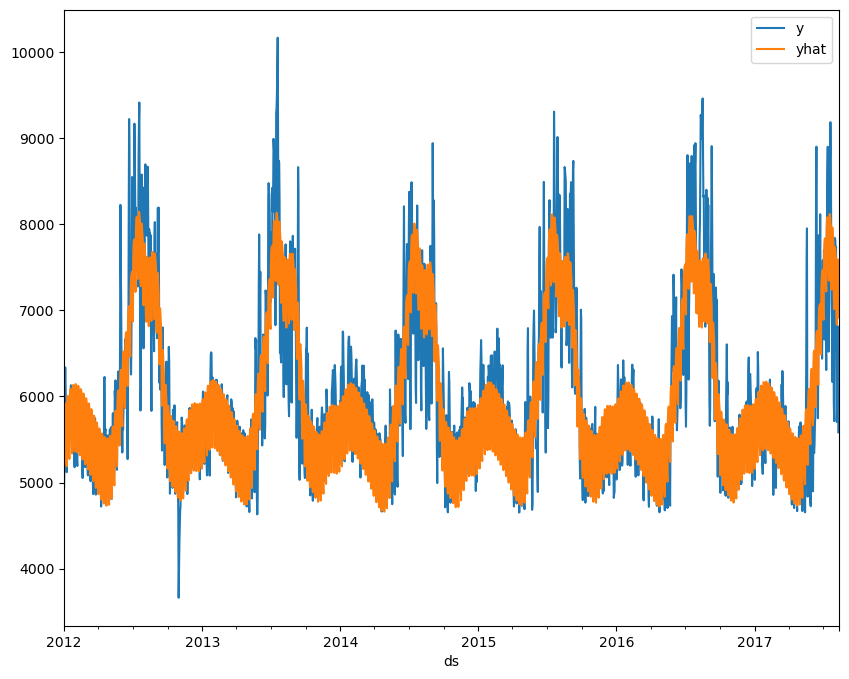

In [62]:
pd.concat([ny_df_final.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

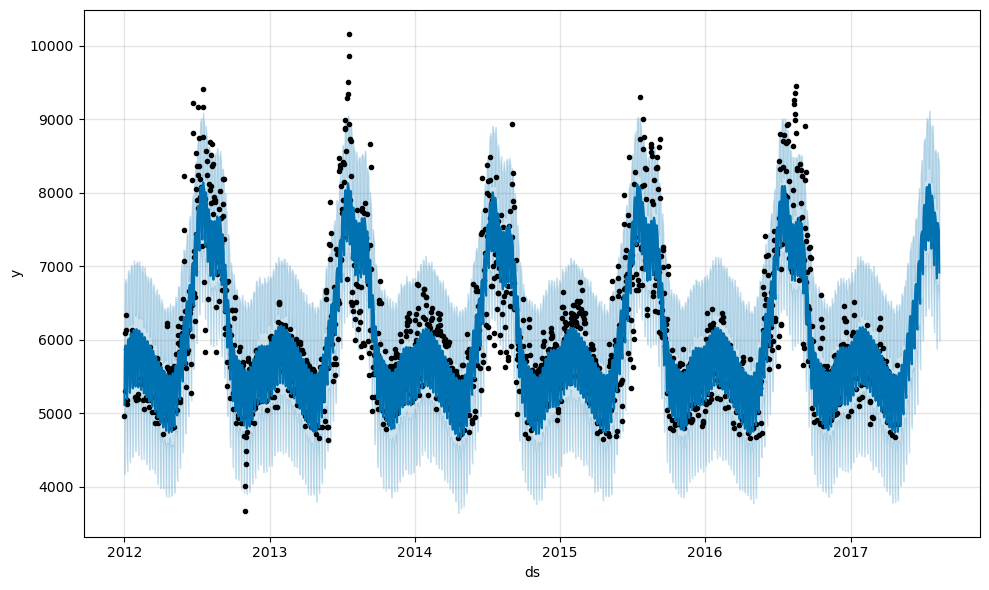

In [64]:
fig1 = m.plot(forecast)

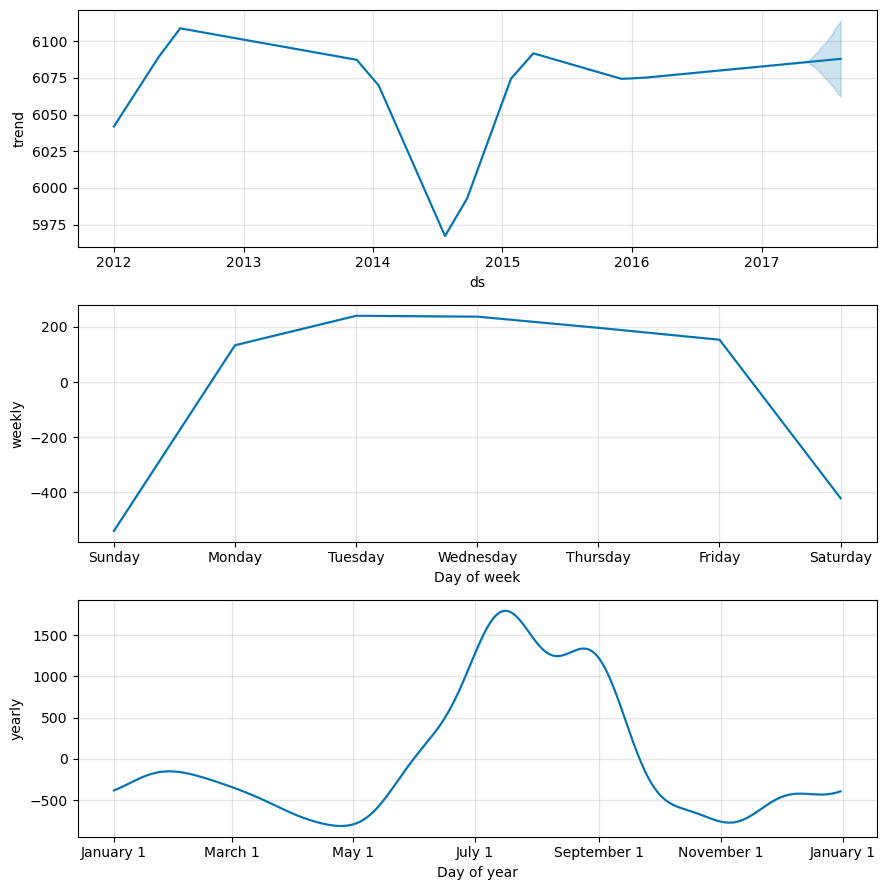

In [66]:

fig2 = m.plot_components(forecast)

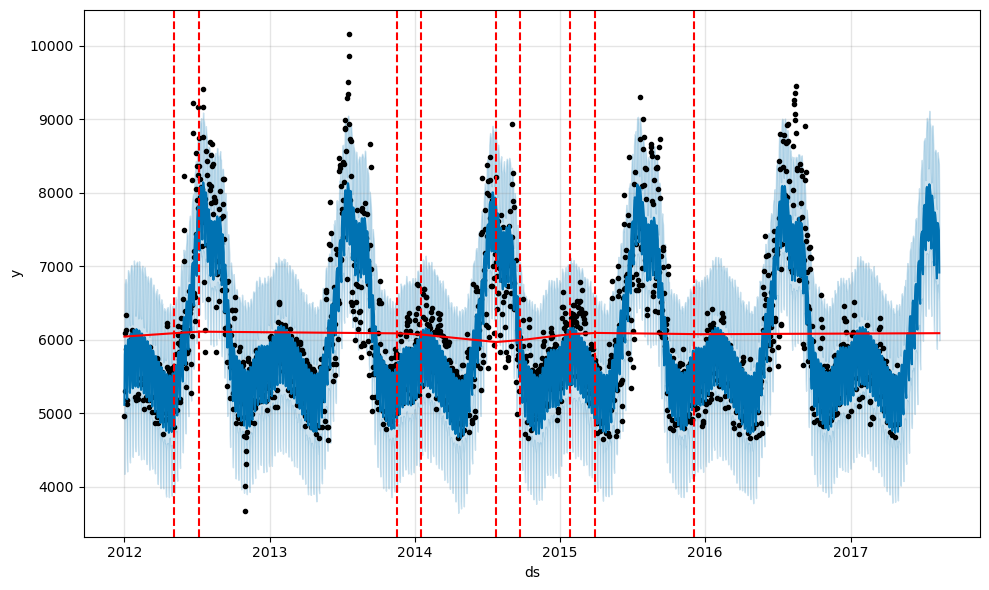

In [70]:

from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [72]:

deltas = m.params['delta'].mean(0)
deltas

array([-2.41958e-08, -1.02196e-02, -6.99955e-02, -4.08400e-05,
       -7.41319e-08, -1.47573e-07, -4.40613e-08,  7.84079e-08,
       -5.91069e-08, -1.21690e-07, -4.58484e-02, -5.09678e-02,
       -4.11113e-08,  1.61811e-06,  1.83664e-01,  4.77067e-02,
       -6.37164e-08, -7.34837e-02, -6.62132e-02,  1.39346e-07,
        2.32319e-07, -3.16977e-08,  1.56664e-02,  2.18398e-03,
        5.42049e-08])

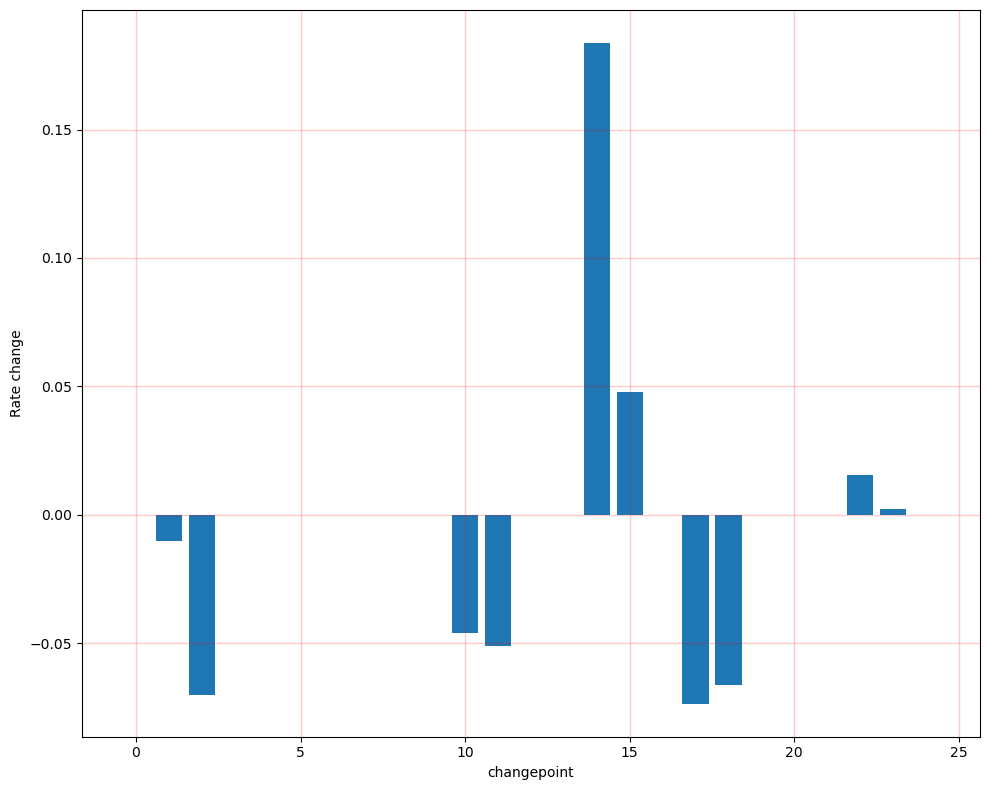

In [74]:

fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas)
ax.grid(True, which='major', c='red', ls='-', lw=1, alpha=0.2)
ax.set_ylabel('Rate change')
ax.set_xlabel('changepoint')
fig.tight_layout()

In [76]:

m.changepoints

62     2012-03-03
124    2012-05-04
187    2012-07-06
249    2012-09-06
311    2012-11-07
373    2013-01-08
436    2013-03-12
498    2013-05-13
560    2013-07-14
622    2013-09-14
685    2013-11-16
747    2014-01-17
809    2014-03-20
871    2014-05-21
934    2014-07-23
996    2014-09-23
1058   2014-11-24
1120   2015-01-25
1183   2015-03-29
1245   2015-05-30
1307   2015-07-31
1369   2015-10-01
1432   2015-12-03
1494   2016-02-03
1556   2016-04-05
Name: ds, dtype: datetime64[ns]

11:10:07 - cmdstanpy - INFO - Chain [1] start processing
11:10:08 - cmdstanpy - INFO - Chain [1] done processing


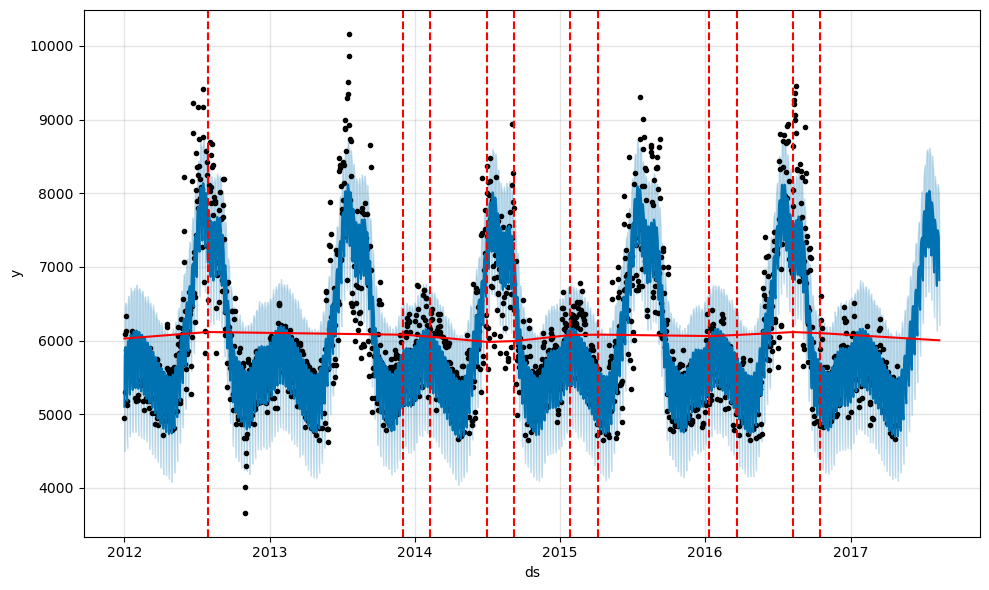

In [78]:

pro_change= Prophet(changepoint_range = 0.9, yearly_seasonality=True)
forecast = pro_change.fit(train).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

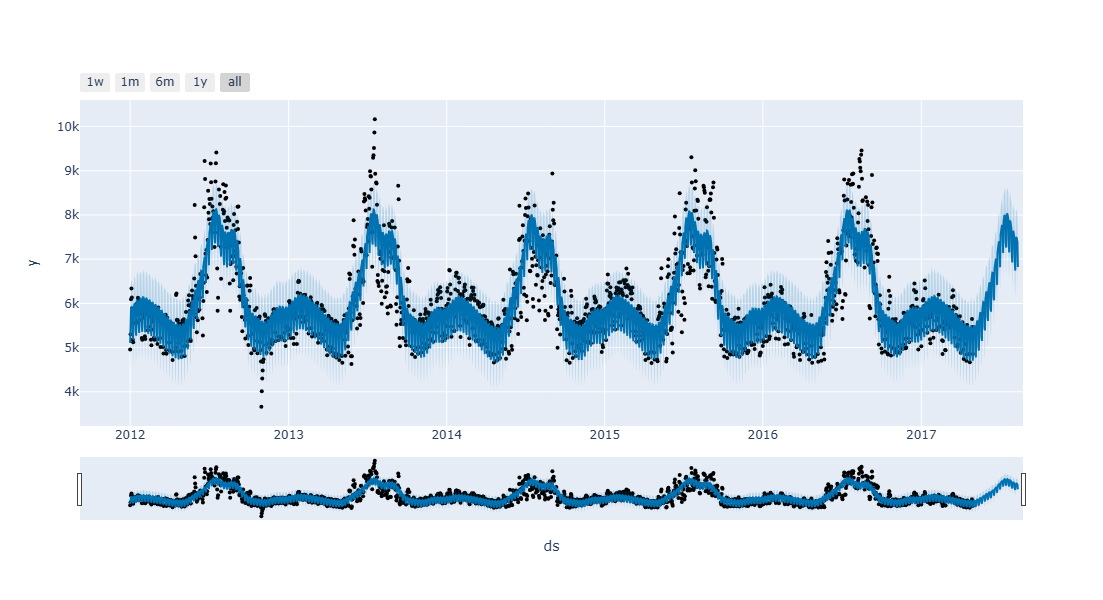

In [80]:

from prophet.plot import plot_plotly
import plotly.offline as py

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)

In [82]:
from prophet.diagnostics import cross_validation
cv_results = cross_validation( model = m, initial = '731 days', horizon = '365 days')

  0%|          | 0/5 [00:00<?, ?it/s]

11:10:51 - cmdstanpy - INFO - Chain [1] start processing
11:10:51 - cmdstanpy - INFO - Chain [1] done processing
11:10:52 - cmdstanpy - INFO - Chain [1] start processing
11:10:52 - cmdstanpy - INFO - Chain [1] done processing
11:10:52 - cmdstanpy - INFO - Chain [1] start processing
11:10:52 - cmdstanpy - INFO - Chain [1] done processing
11:10:53 - cmdstanpy - INFO - Chain [1] start processing
11:10:53 - cmdstanpy - INFO - Chain [1] done processing
11:10:53 - cmdstanpy - INFO - Chain [1] start processing
11:10:53 - cmdstanpy - INFO - Chain [1] done processing


In [84]:
cv_results.head()

ds         yhat   yhat_lower   yhat_upper            y     cutoff
0 2014-05-02  5568.367297  4709.393629  6444.660598  5460.325000 2014-05-01
1 2014-05-03  4978.611000  4133.170429  5787.826499  4893.683333 2014-05-01
2 2014-05-04  4854.953146  4075.186594  5706.511618  4764.137500 2014-05-01
3 2014-05-05  5536.088256  4695.977355  6350.118274  5406.762500 2014-05-01
4 2014-05-06  5631.246867  4824.892481  6423.945635  5409.750000 2014-05-01

In [88]:

from prophet.diagnostics import performance_metrics
df_p = performance_metrics(cv_results)
df_p

horizon            mse        rmse         mae      mape  \
0    36 days 12:00:00  252711.699408  502.704386  406.650703  0.073090   
1    37 days 00:00:00  259467.857078  509.379875  414.094923  0.074384   
2    37 days 12:00:00  261748.756692  511.613875  417.416085  0.074956   
3    38 days 00:00:00  264546.887838  514.341217  420.446939  0.075206   
4    38 days 12:00:00  268211.625778  517.891519  425.611043  0.076029   
..                ...            ...         ...         ...       ...   
653 363 days 00:00:00  261876.002377  511.738217  450.177120  0.083096   
654 363 days 12:00:00  263509.941990  513.332195  451.091448  0.083258   
655 364 days 00:00:00  267999.996366  517.687161  454.720672  0.084115   
656 364 days 12:00:00  267989.498943  517.677022  454.262253  0.084068   
657 365 days 00:00:00  263660.186495  513.478516  451.207457  0.083939   

        mdape     smape  coverage  
0    0.065493  0.072117  0.890110  
1    0.066294  0.073328  0.884615  
2    0.066533  0.073928  0.884615  
3    0.066837  0.074153  0.884615  
4    0.067178  0.075003  0.884615  
..        ...       ...       ...  
653  0.082132  0.082195  0.983516  
654  0.082132  0.082454  0.983516  
655  0.084492  0.083315  0.983516  
656  0.084492  0.083353  0.983516  
657  0.084874  0.083113  0.983516  

[658 rows x 8 columns]

# Time_Series_using_Prophet_for_Multivariate

In [186]:
df.head()

timeStamp  demand  precip   temp
0 2012-01-01 00:00:00  4937.5     0.0  46.13
1 2012-01-01 01:00:00  4752.1     0.0  45.89
2 2012-01-01 02:00:00  4542.6     0.0  45.04
3 2012-01-01 03:00:00  4357.7     0.0  45.03
4 2012-01-01 04:00:00  4275.5     0.0  42.61

In [188]:
ny_df=df.set_index('timeStamp')

array([<Axes: xlabel='timeStamp'>, <Axes: xlabel='timeStamp'>,
       <Axes: xlabel='timeStamp'>], dtype=object)

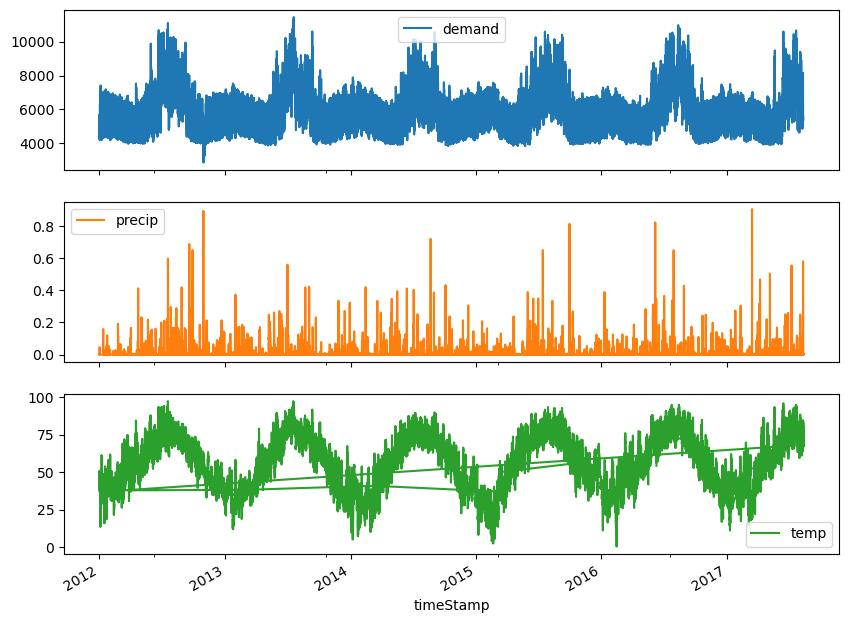

In [190]:

ny_df.plot(subplots=True)

In [191]:

ny_df.resample('D').mean()

demand    precip       temp
timeStamp                                   
2012-01-01  4954.833333  0.002487  46.510000
2012-01-02  5302.954167  0.000000  40.496667
2012-01-03  6095.512500  0.000000  26.672500
2012-01-04  6336.266667  0.000000  20.585000
2012-01-05  6130.245833  0.000000  33.577500
...                 ...       ...        ...
2017-08-08  6471.626042  0.000000  71.039167
2017-08-09  6811.112167  0.047529  73.852500
2017-08-10  5582.297000  0.002033  75.217500
2017-08-11          NaN  0.000000  72.767917
2017-08-12          NaN  0.000443  69.771429

[2051 rows x 3 columns]

array([<Axes: xlabel='timeStamp'>, <Axes: xlabel='timeStamp'>,
       <Axes: xlabel='timeStamp'>], dtype=object)

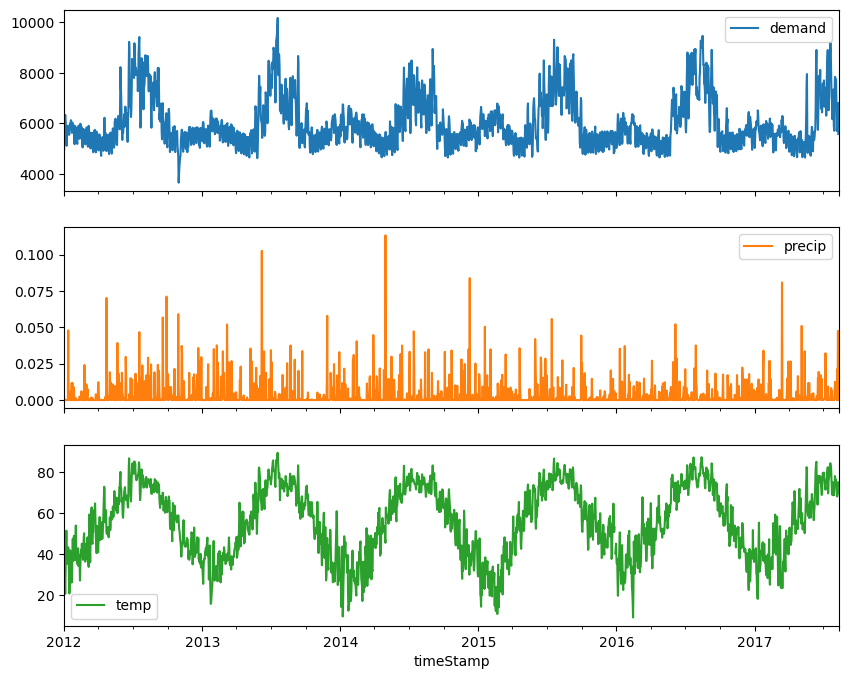

In [192]:

ny_df.resample('D').mean().plot(subplots=True)

In [193]:

ny_df_daily=ny_df.resample('D').mean()

In [194]:

ny_df_daily

demand    precip       temp
timeStamp                                   
2012-01-01  4954.833333  0.002487  46.510000
2012-01-02  5302.954167  0.000000  40.496667
2012-01-03  6095.512500  0.000000  26.672500
2012-01-04  6336.266667  0.000000  20.585000
2012-01-05  6130.245833  0.000000  33.577500
...                 ...       ...        ...
2017-08-08  6471.626042  0.000000  71.039167
2017-08-09  6811.112167  0.047529  73.852500
2017-08-10  5582.297000  0.002033  75.217500
2017-08-11          NaN  0.000000  72.767917
2017-08-12          NaN  0.000443  69.771429

[2051 rows x 3 columns]

In [195]:

ny_df_final=ny_df_daily.reset_index()[['timeStamp','demand','temp']].rename({'timeStamp':'ds','demand':'y','temp':'temp'}, axis='columns')

In [196]:
ny_df_final

ds            y       temp
0    2012-01-01  4954.833333  46.510000
1    2012-01-02  5302.954167  40.496667
2    2012-01-03  6095.512500  26.672500
3    2012-01-04  6336.266667  20.585000
4    2012-01-05  6130.245833  33.577500
...         ...          ...        ...
2046 2017-08-08  6471.626042  71.039167
2047 2017-08-09  6811.112167  73.852500
2048 2017-08-10  5582.297000  75.217500
2049 2017-08-11          NaN  72.767917
2050 2017-08-12          NaN  69.771429

[2051 rows x 3 columns]

In [197]:

ny_df_final.query('temp != temp')

ds            y  temp
1457 2015-12-28  5510.776333   NaN

In [198]:

ny_df_final['temp'] = ny_df_final['temp'].ffill()


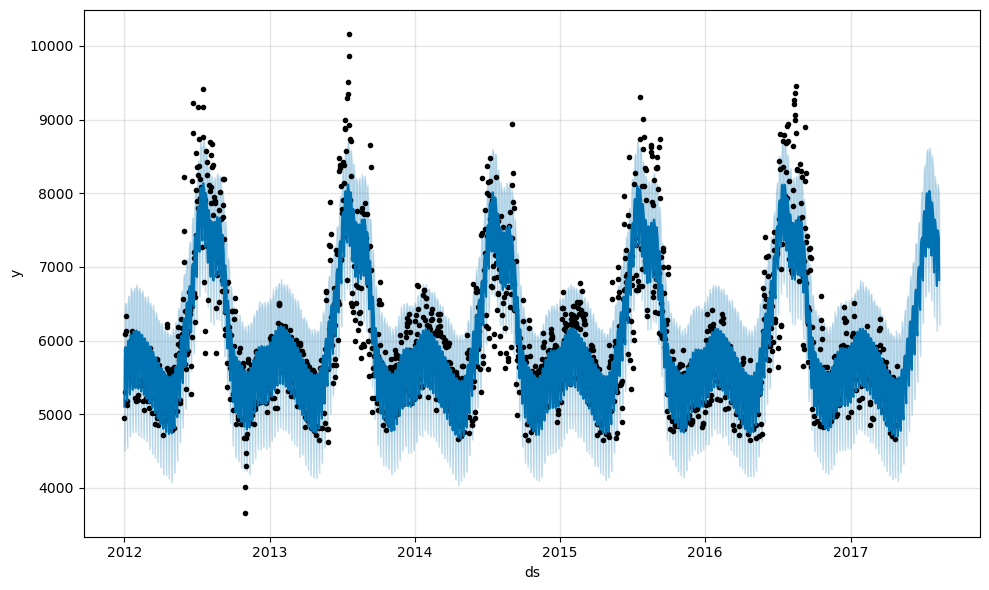

In [199]:
fig1 = m.plot(forecast)

In [200]:

ny_df_final['month']=ny_df_final['ds'].dt.month

In [201]:
ny_df_final.head()

ds            y       temp  month
0 2012-01-01  4954.833333  46.510000      1
1 2012-01-02  5302.954167  40.496667      1
2 2012-01-03  6095.512500  26.672500      1
3 2012-01-04  6336.266667  20.585000      1
4 2012-01-05  6130.245833  33.577500      1

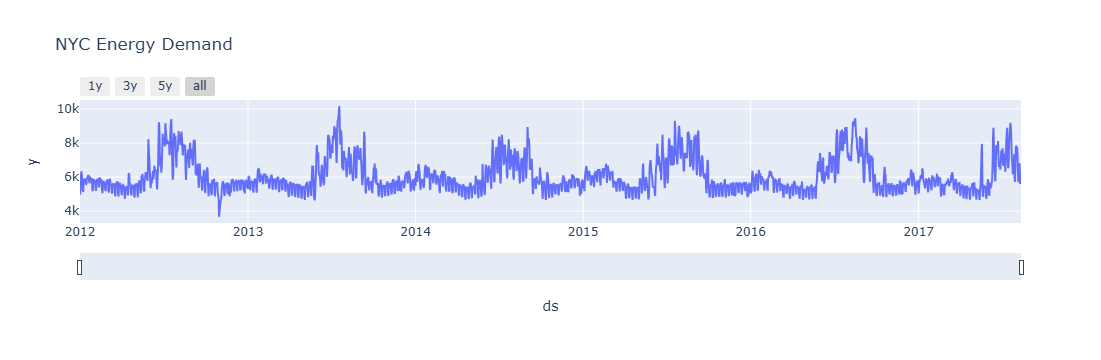

In [202]:

fig = px.line(ny_df_final, x='ds', y='y', hover_data=['temp','month'], title='NYC Energy Demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [203]:
ny_df_final[['month','temp']].groupby('month').agg({'temp':{'max','min','mean'}})

temp                      
             max        min       mean
month                                 
1      55.420455   9.507917  33.432140
2      59.360000   9.015000  34.517758
3      67.878333  20.291667  41.419884
4      72.992083  33.045833  52.600204
5      82.576250  48.090833  62.543994
6      86.916667  52.405833  71.334418
7      89.606667  66.417083  77.595627
8      87.426250  68.042083  75.525947
9      84.448750  57.274583  69.550306
10     74.277500  42.106250  58.642895
11     67.606250  27.172500  47.225638
12     64.735000  22.429583  41.520068

In [204]:
ny_df_final.head()

ds            y       temp  month
0 2012-01-01  4954.833333  46.510000      1
1 2012-01-02  5302.954167  40.496667      1
2 2012-01-03  6095.512500  26.672500      1
3 2012-01-04  6336.266667  20.585000      1
4 2012-01-05  6130.245833  33.577500      1

In [205]:
ny_df_final[['y','temp']].corr()

y      temp
y     1.000000  0.560888
temp  0.560888  1.000000

In [206]:

ny_df_final.query('temp > 80')[['y','temp']].corr()

y      temp
y     1.000000  0.552918
temp  0.552918  1.000000

In [207]:
ny_df_final.query('temp > 80')

ds            y       temp  month
149  2012-05-29  8223.062500  80.242500      5
171  2012-06-20  8172.504167  82.161250      6
172  2012-06-21  9219.370833  86.916667      6
180  2012-06-29  8546.883333  83.293333      6
181  2012-06-30  8047.779167  84.507917      6
...         ...          ...        ...    ...
2025 2017-07-18  8348.907833  80.222083      7
2026 2017-07-19  8820.516042  84.174583      7
2027 2017-07-20  9182.808958  84.501250      7
2028 2017-07-21  8866.241292  83.768750      7
2029 2017-07-22  8047.663625  81.382917      7

[98 rows x 4 columns]

In [208]:
ny_df_final.query('temp <= 80')[['y','temp']].corr()

y      temp
y     1.000000  0.470562
temp  0.470562  1.000000

In [209]:

def summer_temp(temp):
  if temp > 80:
    return 1
  else:
    return 0

In [210]:

ny_df_final['summer_temp']=ny_df_final['temp'].apply(summer_temp)

In [211]:

ny_df_final['month_bins']=pd.cut(ny_df_final['month'],bins=3, labels=False)

In [212]:

ny_df_final

ds            y       temp  month  summer_temp  month_bins
0    2012-01-01  4954.833333  46.510000      1            0           0
1    2012-01-02  5302.954167  40.496667      1            0           0
2    2012-01-03  6095.512500  26.672500      1            0           0
3    2012-01-04  6336.266667  20.585000      1            0           0
4    2012-01-05  6130.245833  33.577500      1            0           0
...         ...          ...        ...    ...          ...         ...
2046 2017-08-08  6471.626042  71.039167      8            0           1
2047 2017-08-09  6811.112167  73.852500      8            0           1
2048 2017-08-10  5582.297000  75.217500      8            0           1
2049 2017-08-11          NaN  72.767917      8            0           1
2050 2017-08-12          NaN  69.771429      8            0           1

[2051 rows x 6 columns]

In [213]:

train=ny_df_final[(ny_df_final['ds'] >= '2012-01-01') & (ny_df_final['ds'] <= '2017-04-30')]
test=ny_df_final[(ny_df_final['ds'] > '2017-04-30')]

In [214]:
train.head()

ds            y       temp  month  summer_temp  month_bins
0 2012-01-01  4954.833333  46.510000      1            0           0
1 2012-01-02  5302.954167  40.496667      1            0           0
2 2012-01-03  6095.512500  26.672500      1            0           0
3 2012-01-04  6336.266667  20.585000      1            0           0
4 2012-01-05  6130.245833  33.577500      1            0           0

In [234]:

m = Prophet(interval_width=0.95,yearly_seasonality=True)

In [236]:
m.add_regressor('summer_temp',standardize=False)
m.add_regressor('month_bins',standardize=False,mode='multiplicative')

In [238]:

m.fit(train)

21:03:44 - cmdstanpy - INFO - Chain [1] start processing
21:03:44 - cmdstanpy - INFO - Chain [1] done processing


In [240]:

m.params

OrderedDict([('lp__', array([[5340.12]])),
             ('k', array([[0.166977]])),
             ('m', array([[0.587004]])),
             ('delta',
              array([[ 1.63288e-05, -4.47917e-03, -2.06269e-01,  8.97650e-10,
                       4.07764e-05,  1.67356e-02,  1.25023e-02,  1.09892e-02,
                       3.32916e-04,  1.77083e-05,  9.64746e-06, -5.96770e-02,
                      -6.96086e-05, -8.54680e-06,  1.57966e-01,  1.08598e-04,
                       2.40415e-05, -1.03008e-01, -4.43656e-02, -8.65223e-06,
                       7.25868e-05,  2.72446e-04,  3.72064e-02,  2.63950e-02,
                       9.15652e-05]])),
             ('sigma_obs', array([[0.0387067]])),
             ('beta',
              array([[-0.0348661 , -0.0591391 ,  0.0498088 ,  0.0401947 , -0.0095088 ,
                      -0.00177704, -0.00761897, -0.00250788,  0.00355115, -0.0058481 ,
                       0.00142548,  0.00306913, -0.00517595, -0.00379594,  0.00346765,
           

In [242]:

future = m.make_future_dataframe(periods=104)
future.tail()

ds
2046 2017-08-08
2047 2017-08-09
2048 2017-08-10
2049 2017-08-11
2050 2017-08-12

In [244]:

future['summer_temp'] = ny_df_final['summer_temp']

In [249]:

future['month_bins'] = ny_df_final['month_bins']

In [251]:
future.head()

ds  summer_temp  month_bins
0 2012-01-01            0           0
1 2012-01-02            0           0
2 2012-01-03            0           0
3 2012-01-04            0           0
4 2012-01-05            0           0

In [253]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
2046 2017-08-08  7381.119882  6539.871139  8130.571537
2047 2017-08-09  7391.954946  6549.177414  8088.077068
2048 2017-08-10  7362.281565  6527.979211  8145.344047
2049 2017-08-11  7312.187527  6497.856579  8114.511213
2050 2017-08-12  6731.326309  5964.391671  7485.853056

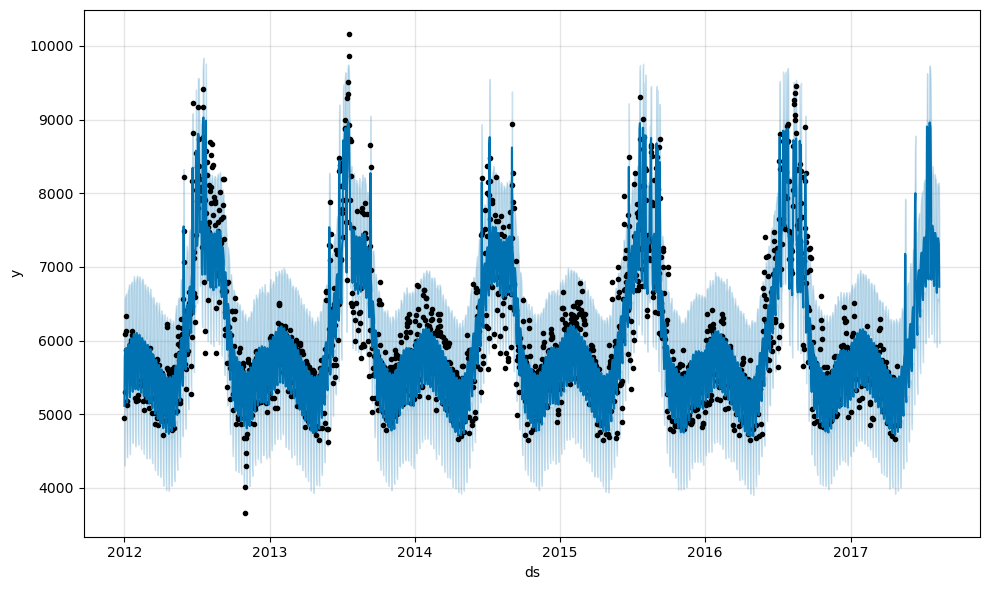

In [255]:

fig1 = m.plot(forecast)

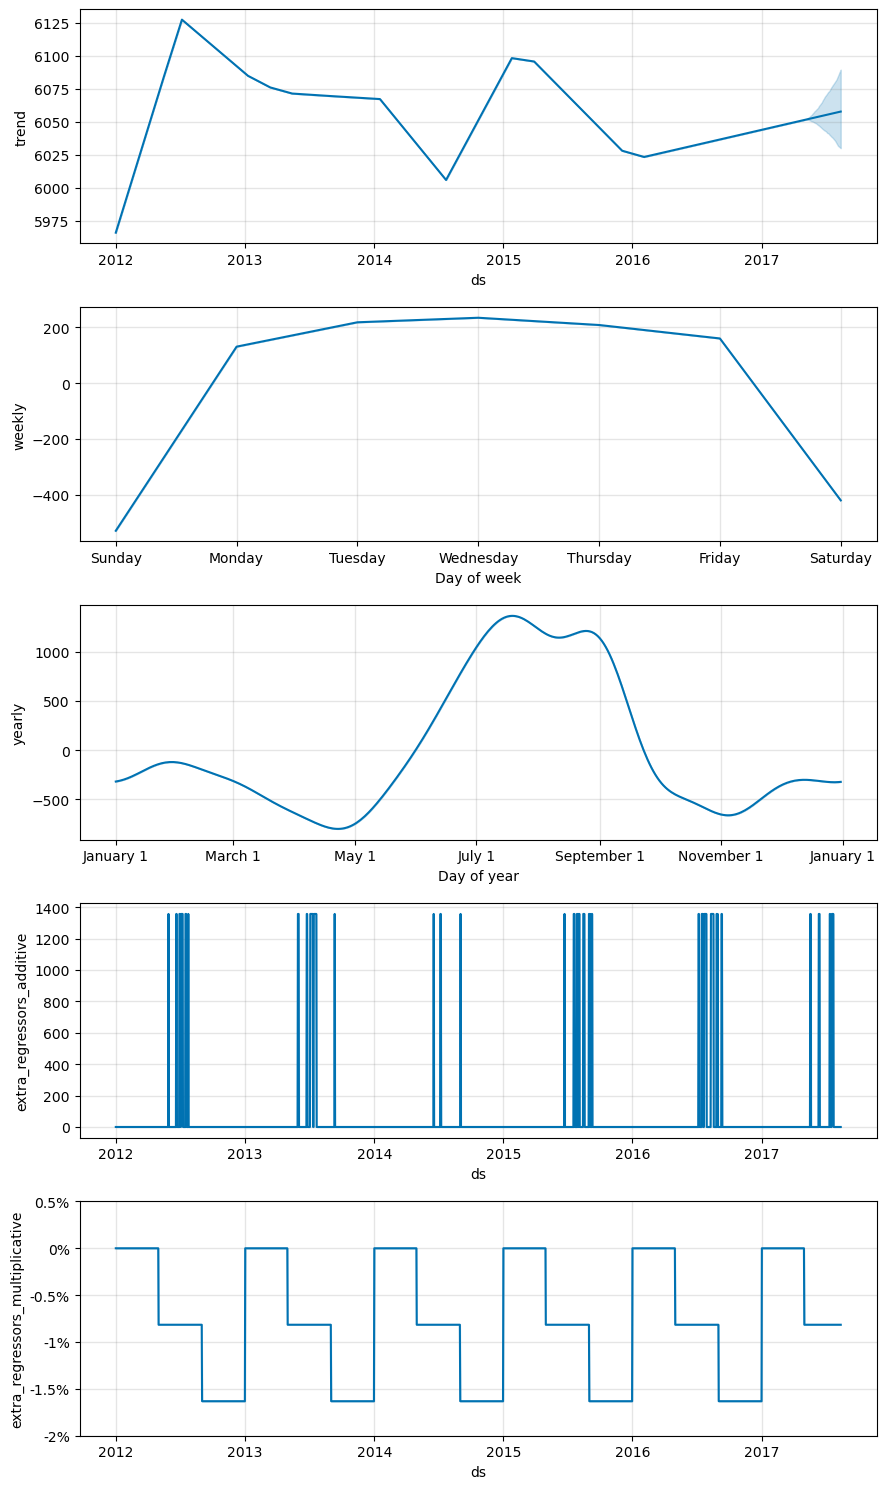

In [257]:

fig2 = m.plot_components(forecast)

In [261]:

from prophet.diagnostics import cross_validation,  performance_metrics
cv_results = cross_validation( model = m, initial = '731 days', horizon = '365 days')
df_p = performance_metrics(cv_results)
df_p

  0%|          | 0/5 [00:00<?, ?it/s]

21:09:40 - cmdstanpy - INFO - Chain [1] start processing
21:09:40 - cmdstanpy - INFO - Chain [1] done processing
21:09:41 - cmdstanpy - INFO - Chain [1] start processing
21:09:41 - cmdstanpy - INFO - Chain [1] done processing
21:09:42 - cmdstanpy - INFO - Chain [1] start processing
21:09:42 - cmdstanpy - INFO - Chain [1] done processing
21:09:42 - cmdstanpy - INFO - Chain [1] start processing
21:09:43 - cmdstanpy - INFO - Chain [1] done processing
21:09:43 - cmdstanpy - INFO - Chain [1] start processing
21:09:43 - cmdstanpy - INFO - Chain [1] done processing


horizon            mse        rmse         mae      mape  \
0    36 days 12:00:00  200267.276103  447.512319  348.062466  0.061668   
1    37 days 00:00:00  206225.960218  454.121085  354.826430  0.062805   
2    37 days 12:00:00  207491.360768  455.512196  357.209780  0.063207   
3    38 days 00:00:00  211594.300193  459.993805  361.377857  0.063639   
4    38 days 12:00:00  213815.713741  462.402113  365.297901  0.064264   
..                ...            ...         ...         ...       ...   
653 363 days 00:00:00  144381.781843  379.976028  315.966769  0.057735   
654 363 days 12:00:00  145008.223510  380.799453  316.036903  0.057747   
655 364 days 00:00:00  147619.783959  384.213201  318.267532  0.058361   
656 364 days 12:00:00  147293.465011  383.788308  317.480865  0.058237   
657 365 days 00:00:00  141299.517685  375.898281  312.798807  0.057792   

        mdape     smape  coverage  
0    0.052035  0.061553  0.895604  
1    0.052692  0.062656  0.884615  
2    0.053760  0.063073  0.884615  
3    0.054523  0.063517  0.879121  
4    0.054881  0.064160  0.879121  
..        ...       ...       ...  
653  0.056048  0.057854  0.978022  
654  0.056048  0.057913  0.978022  
655  0.056521  0.058555  0.972527  
656  0.056331  0.058468  0.972527  
657  0.056331  0.057943  0.978022  

[658 rows x 8 columns]

C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:546: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.

C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:547: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



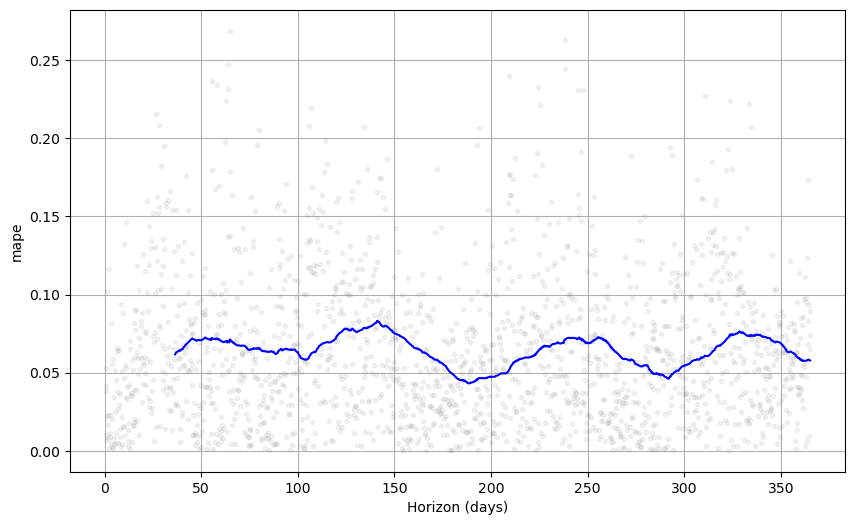

In [263]:

from prophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(cv_results, metric='mape')